# Hunter & Moose. Short presentation of code and graphics.

Consider the following board game, representing the Swedish sport of moose hunting.

Hunter start (1) Moose start (7)   Moose start (12)  

| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
 

The game board has 12 spaces. A moose starts on space 7, and a hunter on space 1. On each game turn a 6-sided die is rolled. On a result of 1 to 4, the moose moves that many spaces forward. On a result of 5 or 6, the hunter moves that many spaces forward. The moose wins if it reaches space 12 (the final roll does not have to be exact, moving past space 12 is ok). The hunter wins if he catches the moose, in other words reaches the same or a higher space.
What are the probabilities of winning for the moose and the hunter?
---------------------------------------------------------------------------------

The taks is solved in two ways: by the Probability Tree Diagram method and the Monte Carlo method (randoms die rolls are simulated and statistics for the results is taken into account).
The methods presented are ganeralized to take into consideration dice with any number of faces
besides the standard 1, 2, 3, 4, 5, 6 - faced die and any start positions of the hunter and the prey. The end position (limit) for the prey can be vary in the implementation of the methods as well.

In what follows the Probability Tree Diagram method is presented in detail with source code.
At the end the results for a simulation of the two methods are compared and it is shown that they give identical results. 

In [1]:
from HunterMooseCode import Player, GameSimulator

hunter_moves = [5, 6]
hunter_weights = [1/2, 1/2]

prey_moves = [1, 2, 3, 4]
prey_weights = [1/4, 1/4, 1/4, 1/4]

###################################################################
hunter_start_position = 1
prey_start_position = 7
prey_end_position = 12
###################################################################

hunter = Player("Hunter", current_pos = hunter_start_position-1,
                moves = hunter_moves, 
                weights = hunter_weights)

prey = Player("Prey", current_pos = prey_start_position-1, 
                moves = prey_moves, 
                weights = prey_weights,
                end_limit = prey_end_position-1)

game_simulator = GameSimulator(hunter, prey, die_size=6)


=====================================================================================================================
=====================================================================================================================

Let us run the simulation. That means the programm generates the representative matrices for all possibles moves of the Hunter and the Prey and the corresponding probabilities. The number of the steps is the maximal die throws untill end of the game.


In [10]:
################################
game_simulator.run_simulation()

###############################
game_simulator.print_stats()


Start simulation...
The simulation finished!
------------------------------------
Hunter win:
---------
Step: 1, Hunter win proba: 0.16667
Step: 2, Hunter win proba: 0.05556
Step: 3, Hunter win proba: 0.11111
Step: 4, Hunter win proba: 0.04630
Step: 5, Hunter win proba: 0.00720
Step: 6, Hunter win proba: 0.00039
---------
Hunter win proba sum: 0.38722
Prey win:
---------
Step: 1, Prey win proba: 0.00000
Step: 2, Prey win proba: 0.27778
Step: 3, Prey win proba: 0.23148
Step: 4, Prey win proba: 0.08873
Step: 5, Prey win proba: 0.01402
Step: 6, Prey win proba: 0.00077
---------
Prey win proba sum: 0.61278
------------------------------------


=====================================================================================================================
=====================================================================================================================

After we have executed the simulation the current step is the last possible step.
With the following function we get the probabilities of the moves by the n-th step.

In [3]:
plot_range=game_simulator.prey.end_limit + game_simulator.die_size

n = 3
proba_array_n = game_simulator.get_proba_bystep( n, plot_range=plot_range )

n = game_simulator.current_step
proba_array_finish = game_simulator.get_proba_bystep( n, plot_range=plot_range )


=====================================================================================================================
=====================================================================================================================

Plot the end state of the game, where current step is the last possible step with the corresponding probabilities of the states.

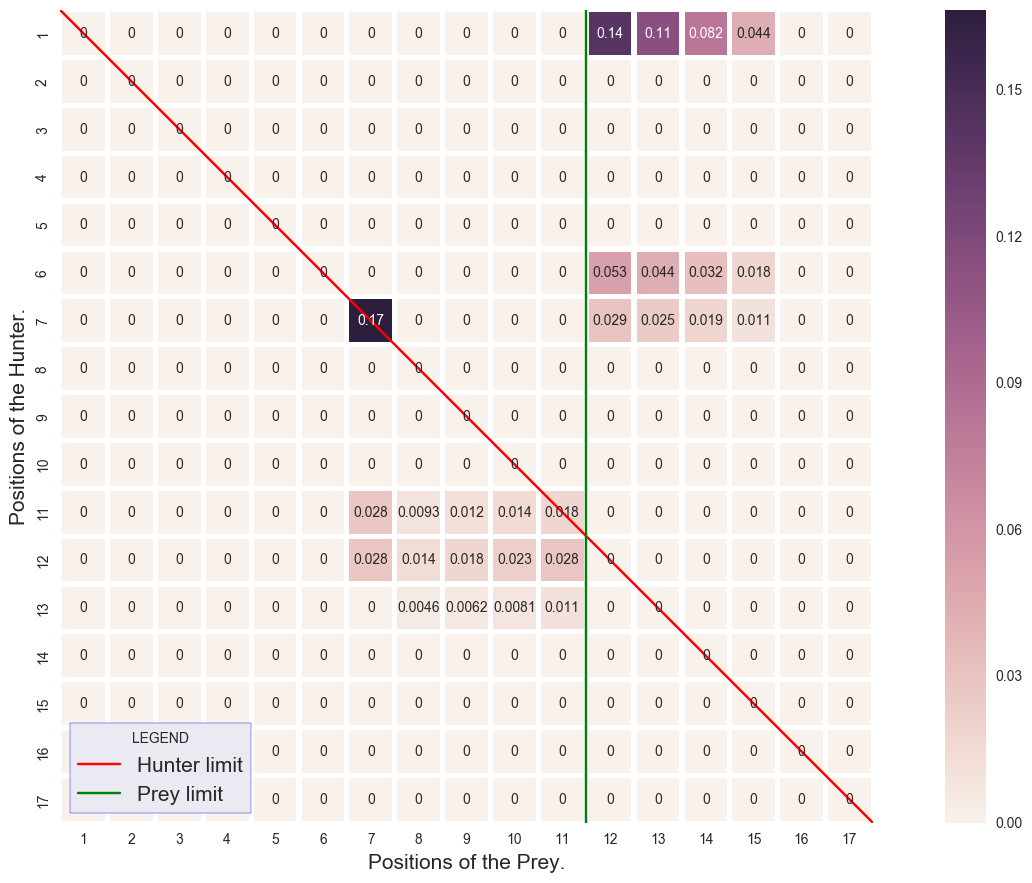

In [4]:
%matplotlib inline

from HunterMooseCode import plot_matrix_proba
import matplotlib.pyplot as plt


plot_range=game_simulator.prey.end_limit + game_simulator.die_size

proba_array_finish = game_simulator.get_proba_bystep( game_simulator.current_step, plot_range )


fig, ax1 = plt.subplots(1)

plot_matrix_proba(proba_array_finish, 
                  labels=list(map(str, list( range(1,plot_range+1) ))),
                  axes=ax1,
                  prey_end=game_simulator.prey.end_limit)

fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

=====================================================================================================================


Let us give the probability mass functions of the Hunter's win (red), Prey's win (green) and finish game (blue) distributed over the different steps of the game on different plots.

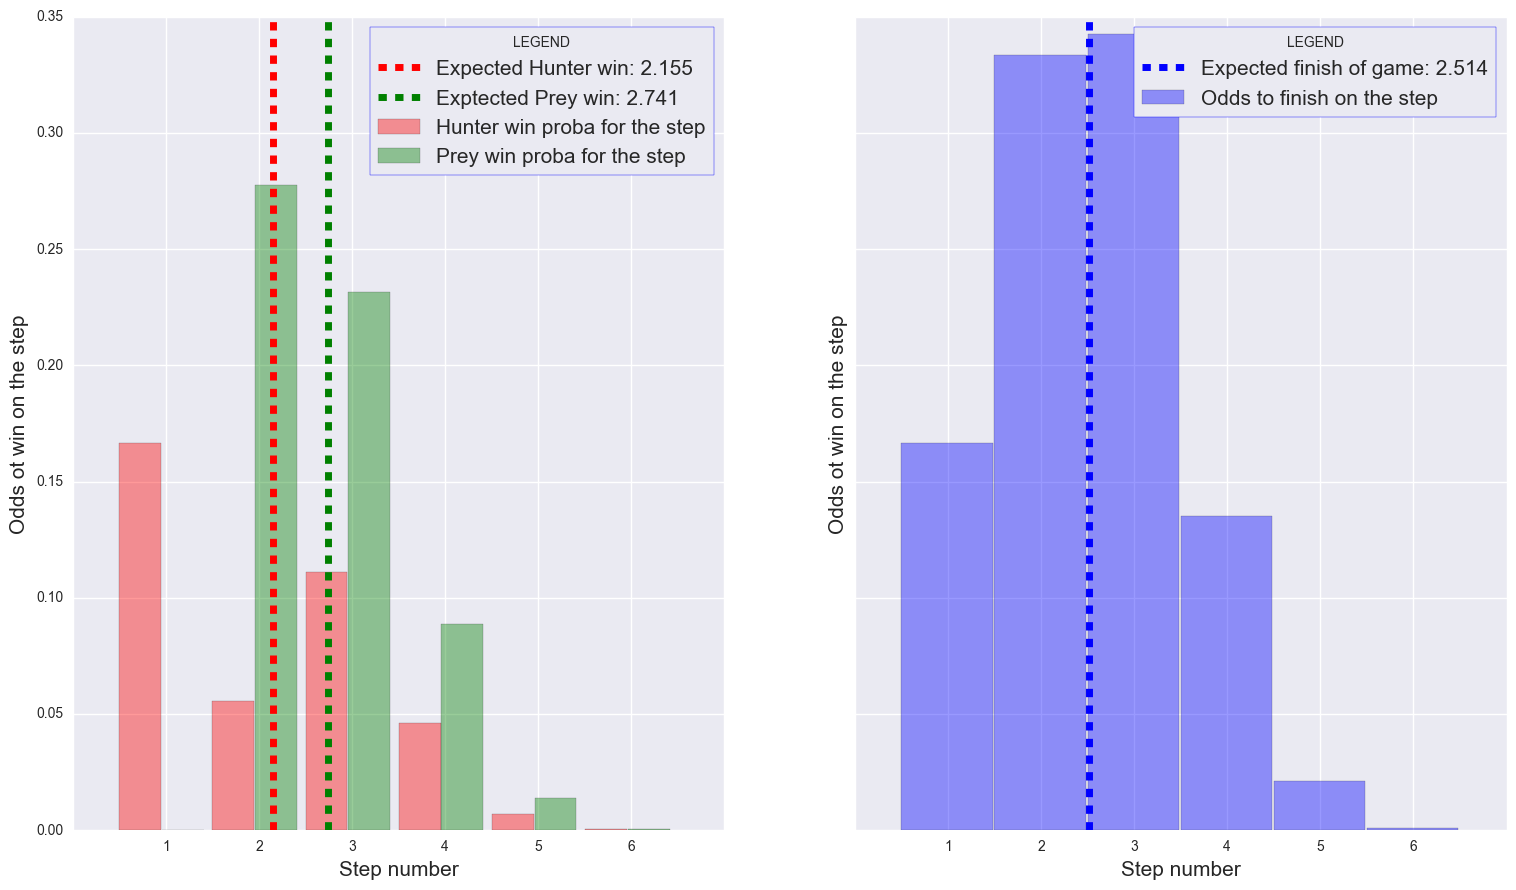

In [5]:
from HunterMooseCode import plot_stats_sharey_bystep, plot_stats_bystep
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plot_stats_sharey_bystep(game_simulator)
fig.set_size_inches(18.5, 10.5)

plt.show()

=====================================================================================================================
=====================================================================================================================

Let us give the probability mass functions of the Hunter's win (red), Prey's win (green) and finish game (blue) distributed over the different steps of the game on one plot. We see from the plot that for every step of the game the sum of the odds Hunter to win plus the odds Prey to win is exactly the probability to finish the game on the corresponding step.

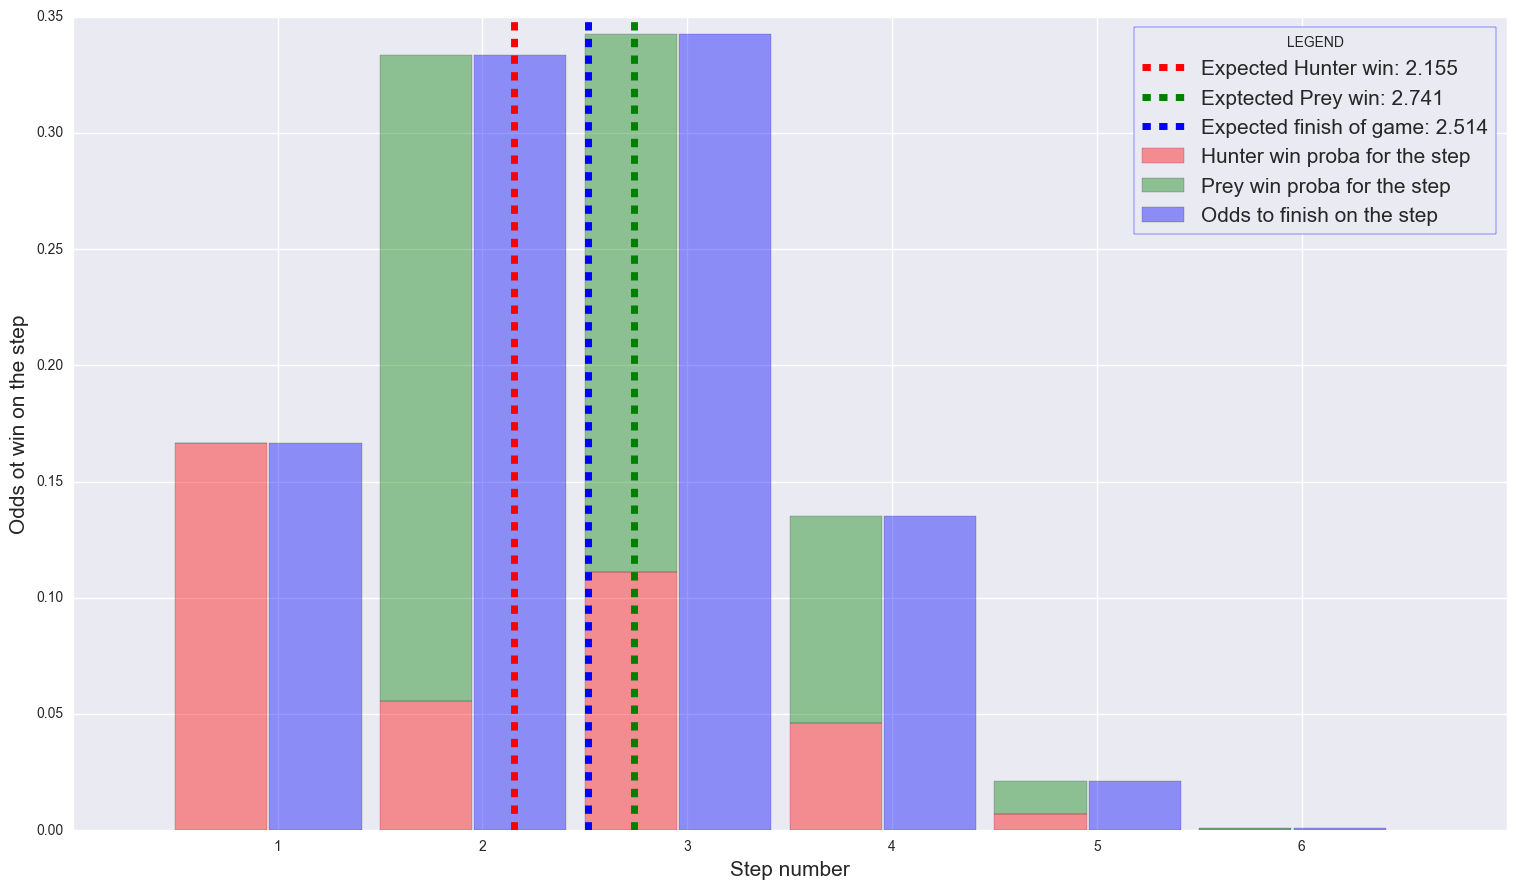

In [6]:
from HunterMooseCode import plot_stats_sharey_bystep, plot_stats_bystep
import matplotlib.pyplot as plt

fig, ax = plot_stats_bystep(game_simulator)
fig.set_size_inches(18.5, 10.5)

plt.show()

=====================================================================================================================
=====================================================================================================================

Here we can try the game with different start positions for the Hunter and Prey and Prey's end position.


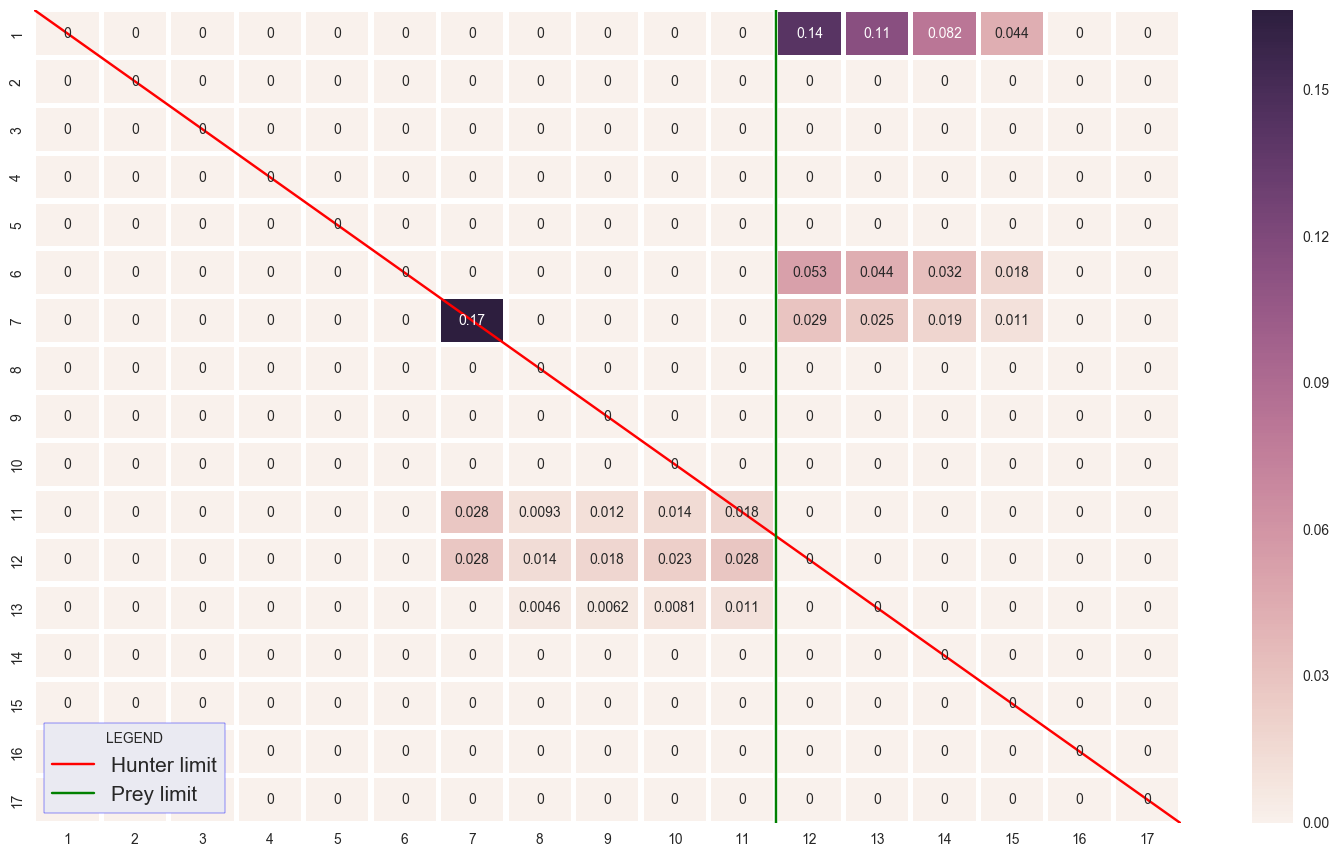

In [2]:
from IPython.display import display, clear_output
from ipywidgets import *
from traitlets import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from HunterMooseCode import plot_matrix_proba, plot_matrix_proba_
from HunterMooseCode import Player, GameSimulator

%matplotlib inline
###################################################################
###################################################################
hunter_start_position1 = 1
prey_start_position1 = 7
prey_end_position1 = 12
###################################################################
###################################################################

hunter_moves1 = [5, 6]
hunter_weights1 = None
[1/2, 1/2]

prey_moves1 = [1, 2, 3, 4]
prey_weights1 = None
[1/4, 1/4, 1/4, 1/4]

####################################################################

hunter1 = Player("Hunter", current_pos = hunter_start_position1-1,
                moves = hunter_moves1, 
                weights = hunter_weights1)

prey1 = Player("Prey", current_pos = prey_start_position1-1, 
                moves = prey_moves1, 
                weights = prey_weights1,
                end_limit = prey_end_position1-1)

game_simulator1 = GameSimulator(hunter1, prey1, die_size=6)
game_simulator1.run_simulation()

#print(game_simulator1.current_step)
###################################################################

plot_range1 = game_simulator1.prey.end_limit + game_simulator1.die_size
labels1=list(map(str, list( range(1, plot_range1+1) )))

proba_allsteps1 = {st: pd.DataFrame(game_simulator1.get_proba_bystep(st, plot_range1),
                                   index=labels1, columns=labels1) \
                        for st in range(0, game_simulator1.current_step+1)}
###################################################################
def game(step):
    plt.figure(figsize=(18.5, 10.5))
    plot_matrix_proba_(proba_allsteps1[step],
                      labels=labels1,
                      prey_end=game_simulator1.prey.end_limit)
    
max_step = game_simulator1.current_step
step_slider = IntSlider(value = max_step, min = 0, max = max_step,
                        description = "Step(%d-%d)" % (0,max_step))

wid = interactive(game, step=step_slider)
display(wid)

##################################################################

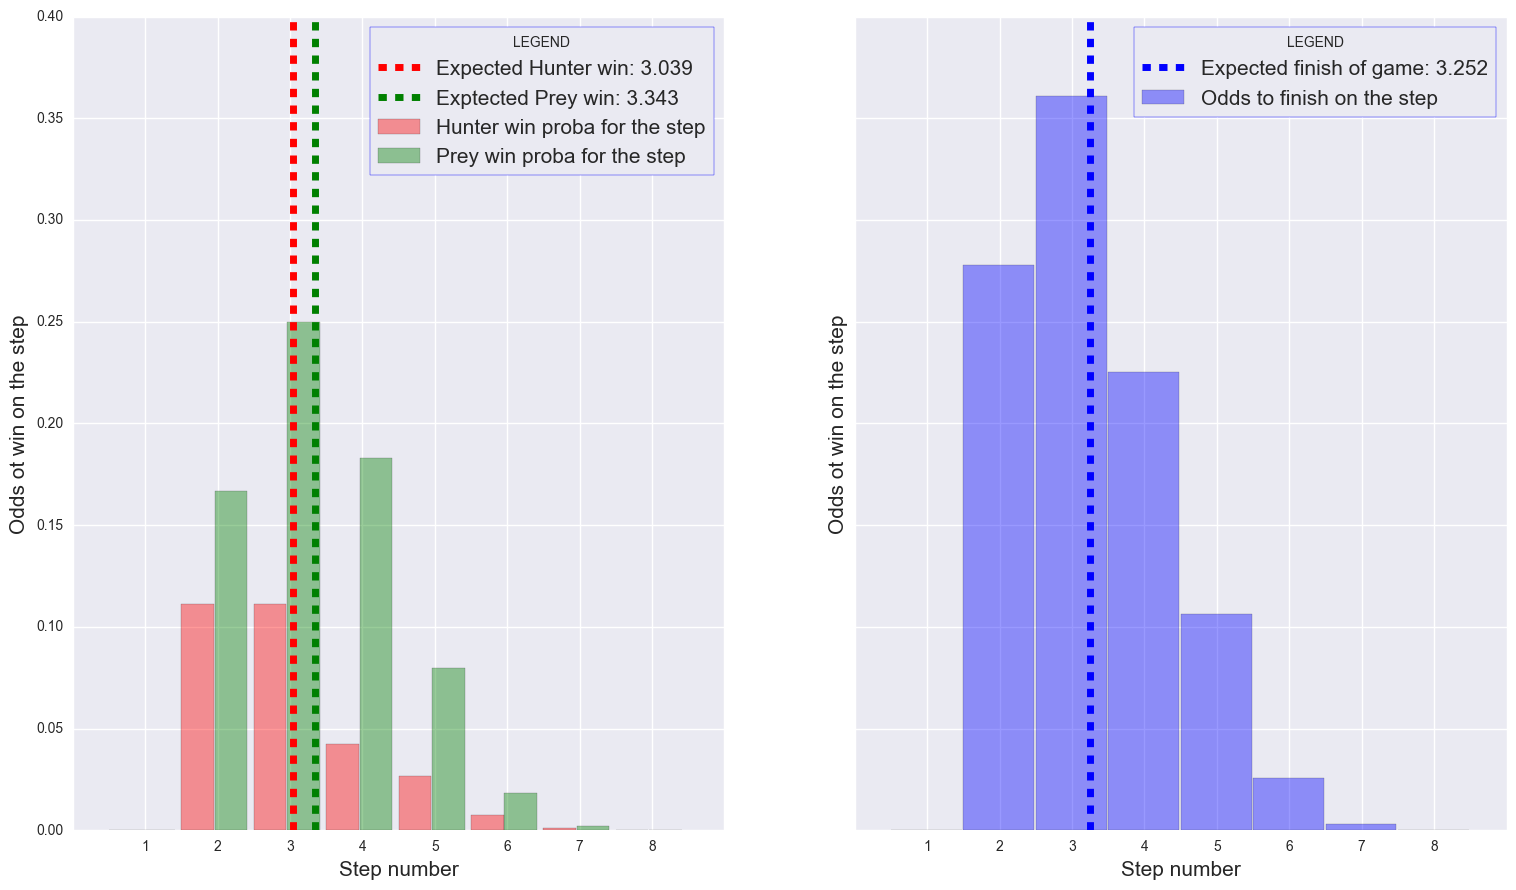

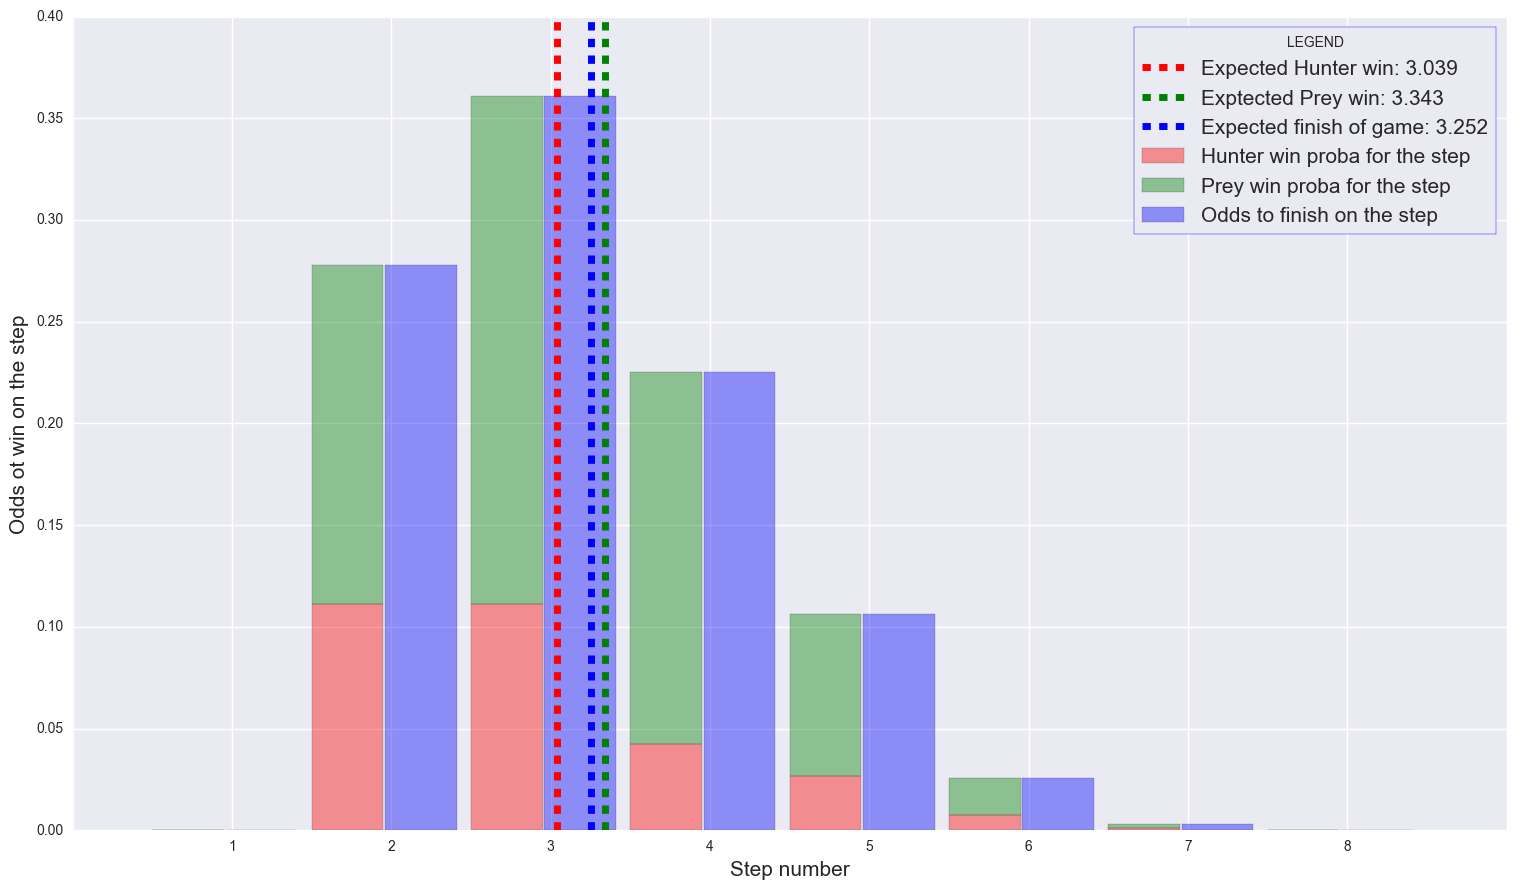

In [8]:
##################################################################
from HunterMooseCode import plot_stats_sharey_bystep, plot_stats_bystep
import matplotlib.pyplot as plt

fig1, (ax11, ax21) = plot_stats_sharey_bystep(game_simulator1)
fig1.set_size_inches(18.5, 10.5)

fig2, ax22 = plot_stats_bystep(game_simulator1)
fig2.set_size_inches(18.5, 10.5)

=====================================================================================================================
=====================================================================================================================

Comapreson of the results from the Probability Tree Diagram method and the Monte Carlo Method.
It is normal the Monte Carlo method to give slightly different result since it is an approximation of the exact probability distribution, which is given by the Probability Tree Diagram method.

In [5]:
from HunterMooseCode import Player, GameSimulator
from HunterMooseCodeMonteCarlo import PlayerMC, MCGameSimulator



###################################################################
####   Probability Tree Diagrams simulation
##################################################################  
def probability_tree_diagram_simulation(hunter_start,
                                        hunter_moves,
                                        prey_start,
                                        prey_moves,
                                        prey_end):
    
    print("========-----------===========------------========")

    hunter = Player("Hunter", current_pos=hunter_start-1,
                    moves=hunter_moves)
    prey = Player("Prey", current_pos=prey_start-1, 
                    moves=prey_moves,
                    end_limit=prey_end-1)
    
            
    game = GameSimulator(hunter, prey)  

    game.run_simulation()
    game.print_stats()
    
    print("========-----------===========------------========")

    
###################################################################
####   Monte Carlo simulation
##################################################################      
def monte_carlo_simulation(hunter_start,
                            hunter_moves,
                            prey_start,
                            prey_moves,
                            prey_end,
                            num_simulation_games):

    print("========-----------===========------------========")
    
    hunter = PlayerMC("Hunter",
                    current_pos = hunter_start-1,
                    moves = hunter_moves)

    prey = PlayerMC("Prey",
                  current_pos = prey_start-1, 
                  moves = prey_moves, 
                  end_limit = prey_end-1)

    game_mc = MCGameSimulator(hunter, prey, 
                              num_simulation_games=num_simulation_games)
    print("Number of simulation games: %d" % num_simulation_games)
    game_mc.run_simulation()
    
    game_mc.print_stats()
    
    print("========-----------===========------------========")

    
####################################################################
#########  Parameters of the Game
####################################################################
hunter_moves2 = [5, 6]
prey_moves2 = [1, 2, 3, 4]

###################################################################
hunter_start_position2 = 1
prey_start_position2 = 7
prey_end_position2 = 12

#hunter_start_position2 = 1
#prey_start_position2 = 7
#prey_end_position2 = 12
###################################################################



####################################################################
#########  Simulation of both methods of the Game
####################################################################

probability_tree_diagram_simulation(hunter_start=hunter_start_position2,
                                    hunter_moves=hunter_moves2,
                                    prey_start=prey_start_position2,
                                    prey_moves=prey_moves2,
                                    prey_end=prey_end_position2)

number_simulation_games = 1000
monte_carlo_simulation(hunter_start=hunter_start_position2,
                        hunter_moves=hunter_moves2,
                        prey_start=prey_start_position2,
                        prey_moves=prey_moves2,
                        prey_end=prey_end_position2,
                        num_simulation_games=number_simulation_games)



========-----------===========------------========
Start simulation...
The simulation finished!
------------------------------------
Hunter win:
---------
Step: 1, Hunter win proba: 0.16667
Step: 2, Hunter win proba: 0.05556
Step: 3, Hunter win proba: 0.11111
Step: 4, Hunter win proba: 0.04630
Step: 5, Hunter win proba: 0.00720
Step: 6, Hunter win proba: 0.00039
---------
Hunter win proba sum: 0.38722
Prey win:
---------
Step: 1, Prey win proba: 0.00000
Step: 2, Prey win proba: 0.27778
Step: 3, Prey win proba: 0.23148
Step: 4, Prey win proba: 0.08873
Step: 5, Prey win proba: 0.01402
Step: 6, Prey win proba: 0.00077
---------
Prey win proba sum: 0.61278
------------------------------------
========-----------===========------------========
========-----------===========------------========
Number of simulation games: 1000
Start MC simulation....
MC simulation finished!
------------------------------------
Step 1:    Hunter: 0.17600, Prey: 0.00000, End game: 0.17600
Step 2:    Hunter: 0.